In [1]:
import glob
import json
import os
from PIL import Image, ImageDraw
import numpy as np
import torch

dataset = 'fashioniq' # Change This
if dataset == 'fashioniq':
    with open('../logdir/fashioniq_dcnet/val/att_result.pt', 'rb') as f:
        att = torch.load(f)
    image_dir = '../dataset/fashioniq/resized_images'
elif dataset == 'shoe':
    with open('../logdir/shoe_dcnet/val/att_result.pt', 'rb') as f:
        att = torch.load(f)
    image_dir = '../dataset/shoe/resized_images'


In [2]:
att.keys()

dict_keys(['dress', 'shirt', 'toptee'])

In [3]:
if dataset == 'fashioniq':
    meta, weight = att['dress'][0] # Can change category, idx number
elif dataset == 'shoe':
    meta, weight = att['shoe'][0]
meta[0].keys()

dict_keys(['candidate', 'target', 'captions', 'ranking'])

has thin straps and different pattern more autumn colored and longer


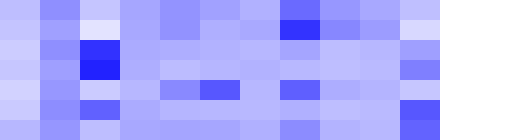

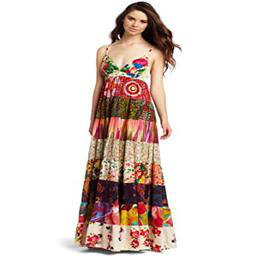

In [5]:
idx = 4 # Change This range: 0 ~ Batch_size
if dataset == 'fashioniq':
    print(' '.join(meta[idx]['captions']))
elif dataset == 'shoe':
    print(meta[idx]['captions'])
w = weight[idx]
m, l = w.size()
img = Image.new("RGB", (l*40, m*20), (255,255,255) )
img1 = ImageDraw.Draw(img)  
# FashionIQ:  full, inter, up, left, center, right, down
# Shoes:      full, inter1, inter2, up, left, center, right, down

for i in range(l):
    for j in range(m):
        shape = [i*40, j*20, i*40+40, j*20+20]
        img1.rectangle(shape, fill = (255-1000*w[j][i],255-1000*w[j][i],255)) 
display(img)

target_img = meta[idx]['target']
im_path = os.path.join(image_dir, target_img+'.jpg')
im = Image.open(im_path).convert('RGB')
display(im)